In [1]:
from standardized import run_standardized
run_standardized(3)

running  3  templates
on  0
on  10
on  20
on  30
on  40
on  50
on  60
on  70
on  80
on  90


In [ ]:
from personalized_analogous import run_personalized_analogous
run_personalized_analogous(n_templates=4)

running  4  templates
on  0
on  10
on  20
on  30
on  40
on  50
on  60
on  70
on  80
on  90


In [2]:
run_personalized_analogous(n_templates=6)

running  6  templates
on  0
on  10
on  20
on  30
on  40
on  50
on  60
on  70
on  80
on  90


In [1]:
from personalized_analogous import run_personalized_analogous
run_personalized_analogous(n_templates=8)

running  8  templates
on  0
on  10
on  20
on  30
on  40
on  50
on  60
on  70
on  80
on  90


In [14]:
import numpy as np
temp_list = {"gesture1": 10.153, "gesture2": 5.432}
temp_list["gesture3"] = 7.5222
distance = temp_list.get("gesture1")
distances = sorted(list(temp_list.values()))
print(distances)
distances.index(distance) +1

[5.432, 7.5222, 10.153]


3

## split test-train

In [2]:
# experimenter-only
n_templates = 3
etype = "experimenter-only"
for pID in pIDs_personalized:
    # print('running ',pID)
    experiment_types = pd.read_csv(temp_path[:-24]+'fnames/'+pID+'_fnames.csv',header=0,index_col=0)
    experiment_types = experiment_types.loc[experiment_types['etype']=='experimenter-defined']
    test_train_split(pID,experiment_types,etype=etype,n_templates=n_templates)
# rotate
n_templates = 3
etype = "rotate"
for pID in pIDs_analogous:
    # print('running ',pID)
    experiment_types = pd.read_csv(temp_path[:-24]+'fnames/'+pID+'_fnames.csv',header=0,index_col=0)
    experiment_types = experiment_types.loc[(experiment_types['etype']=='rehab') & (experiment_types['motion']!="endurance")]
    test_train_split(pID,experiment_types,etype=etype,n_templates=n_templates)

## run normal

In [3]:
df_accuracy = pd.DataFrame()
etype = 'experimenter-only'
for pID in pIDs_personalized:
    print('running ',pID)
    # train_dollar,test_dollar = dollar_normal(pID,etype,n_templates=3)
    
    accuracy = np.asarray([
                        [train_vanilla[1],test_vanilla[1],'vanillaNN'],
                        # [train_dollar,test_dollar,'dollar'],
                        # [train_expert,test_expert,'expert']
                        ])
    df_temp = pd.DataFrame(accuracy,columns=['train','test','algoType'])
    if pID[1]=='1':
        df_temp['ptype'] = 'disabled'
    else:
        df_temp['ptype'] = 'non-disabled'
    df_temp['pID'] = pID
    df_accuracy = df_accuracy.append(df_temp)
df_accuracy['train'] = df_accuracy.train.astype(float)
df_accuracy['test'] = df_accuracy.test.astype(float)
df_accuracy.to_csv('data/algos_accuracy_3.csv')

running  P001
D:\Research\2024_UIST_dataset\upload\segmented_filtered_data\P001\movavg_files/234726104702_P001_experimenter-defined_EMG_select-single_5_movavg.csv
D:\Research\2024_UIST_dataset\upload\segmented_filtered_data\P001\movavg_files/234726104707_P001_experimenter-defined_EMG_select-single_6_movavg.csv
D:\Research\2024_UIST_dataset\upload\segmented_filtered_data\P001\movavg_files/234726104723_P001_experimenter-defined_EMG_select-single_10_movavg.csv
D:\Research\2024_UIST_dataset\upload\segmented_filtered_data\P001\movavg_files/234826104829_P001_experimenter-defined_EMG_pan_2_movavg.csv
D:\Research\2024_UIST_dataset\upload\segmented_filtered_data\P001\movavg_files/234826104833_P001_experimenter-defined_EMG_pan_3_movavg.csv
D:\Research\2024_UIST_dataset\upload\segmented_filtered_data\P001\movavg_files/234826104848_P001_experimenter-defined_EMG_pan_7_movavg.csv
D:\Research\2024_UIST_dataset\upload\segmented_filtered_data\P001\movavg_files/235126105104_P001_experimenter-defined_EMG

KeyboardInterrupt: 

In [ ]:
df_accuracy.head()

,train,test,algoType,ptype,pID
0,1.0,0.828571,dollar,non-disabled,P001
0,1.0,1.000000,dollar,non-disabled,P003
0,1.0,1.000000,dollar,non-disabled,P004
0,1.0,0.814286,dollar,non-disabled,P005
0,1.0,0.871429,dollar,non-disabled,P006


non-disabled Unnamed: 0    0.000
train         1.000
test          0.875
dtype: float64
disabled Unnamed: 0    0.00000
train         1.00000
test          0.88956
dtype: float64


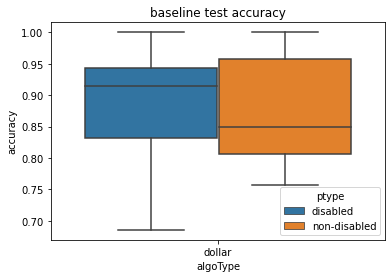

In [ ]:
# df_accuracy.to_csv('data/algos_accuracy_3.csv')
df_accuracy = pd.read_csv('data/algos_accuracy_3.csv')
sns.boxplot(data=df_accuracy,x="algoType",y="test",hue="ptype",hue_order=['disabled','non-disabled'])

plt.title('baseline test accuracy')
plt.ylabel('accuracy')
for x in ["non-disabled","disabled"]:
    print(x,df_accuracy[df_accuracy["ptype"]==x].mean())

## run rotate

In [ ]:
df_rotate_accuracy = pd.DataFrame()

for pID in pIDs_analogous:
    print('running ',pID)
    accuracies_dollar= dollar_rotate(pID,etype='rotate')
    # accuracies_expert = expert_rotate(pID,etype='rotate')
    # accuracies_vanillaNN = vanillaNN_rotate(pID,etype="rotate")

    accuracy = np.asarray([
                            # [accuracies_vanillaNN,accuracies_vanillaNN,accuracies_vanillaNN,accuracies_vanillaNN,'vanillaNN'],
                            [accuracies_dollar[0],accuracies_dollar[1],accuracies_dollar[2],accuracies_dollar[3],'dollar'],
                            # [accuracies_expert[0],accuracies_expert[1],accuracies_expert[2],accuracies_expert[3],'expert']
                            ])
    df_temp = pd.DataFrame(accuracy,columns=['overall','normal','fast','large','algoType'])
    if pID[1]=='1':
        df_temp['ptype'] = 'disabled'
    else:
        df_temp['ptype'] = 'non-disabled'
    df_temp['pID'] = pID
    df_rotate_accuracy = df_rotate_accuracy.append(df_temp)
df_rotate_accuracy['overall'] = df_rotate_accuracy.overall.astype(float)
df_rotate_accuracy['normal'] = df_rotate_accuracy.normal.astype(float)
df_rotate_accuracy['fast'] = df_rotate_accuracy.fast.astype(float)
df_rotate_accuracy['large'] = df_rotate_accuracy.large.astype(float)
df_rotate_accuracy.to_csv('data/rotate_algos_accuracy_3.csv')


running  P001
dollar  P001 overall,normal,fast,large accuracy:  0.95 1.0 0.9 1.0
running  P003
dollar  P003 overall,normal,fast,large accuracy:  1.0 1.0 1.0 1.0
running  P004
dollar  P004 overall,normal,fast,large accuracy:  1.0 1.0 1.0 1.0
running  P005
dollar  P005 overall,normal,fast,large accuracy:  1.0 1.0 1.0 1.0
running  P006
dollar  P006 overall,normal,fast,large accuracy:  0.39999999999999997 1.0 0.7 0.1
running  P008
dollar  P008 overall,normal,fast,large accuracy:  1.0 1.0 1.0 1.0
running  P010
dollar  P010 overall,normal,fast,large accuracy:  0.75 1.0 0.5 1.0
running  P011
dollar  P011 overall,normal,fast,large accuracy:  0.95 0.7 0.9 1.0
running  P102
dollar  P102 overall,normal,fast,large accuracy:  0.6 0.7 0.2 1.0
running  P103
dollar  P103 overall,normal,fast,large accuracy:  0.8500000000000001 0.7 0.8 0.9
running  P104
dollar  P104 overall,normal,fast,large accuracy:  0.6499999999999999 0.4 0.7 0.6
running  P105
dollar  P105 overall,normal,fast,large accuracy:  1.0 1.0

non-disabled Unnamed: 0    0.00000
test          0.88125
normal        0.96250
fast          0.87500
large         0.88750
dtype: float64
disabled Unnamed: 0    0.000
test          0.666
normal        0.756
fast          0.672
large         0.660
dtype: float64


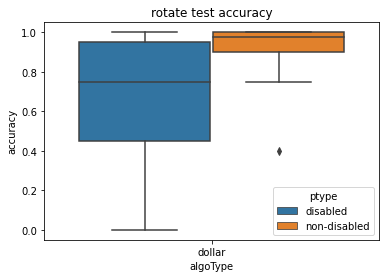

In [2]:
df_rotate_accuracy = pd.read_csv('data/rotate_algos_accuracy_3.csv')
df_rotate_accuracy = df_rotate_accuracy.rename(columns={"overall":"test"})
sns.boxplot(data=df_rotate_accuracy,x="algoType",y="test",hue="ptype",hue_order=['disabled','non-disabled'])

plt.title('rotate test accuracy')
plt.ylabel('accuracy')

for x in ["non-disabled","disabled"]:
    print(x,df_rotate_accuracy[df_rotate_accuracy["ptype"]==x].mean())

In [ ]:
df_standardized = pd.DataFrame()

for ix,pID in enumerate(pIDs_standardized):
    pIDs = np.delete(np.asarray(pIDs_standardized),ix)
    print("running ", pID, ' which is ', ix+1, ' out of ', len(pIDs_standardized))
    train_dollar,test_dollar = train_standardized(pIDs,[pID],algoType='dollar')
    # train_expert,test_expert = train_standardized(pIDs,[pID],algoType='expert')
    # train_vanilla,test_vanilla = train_standardized(pIDs,[pID],algoType='vanillaNN')
    # break;
    accuracy = np.asarray([
                        # [train_vanilla,test_vanilla,'vanillaNN'],
                        [train_dollar,test_dollar,'dollar'],
                        # [train_expert,test_expert,'expert']
                        ])
    df_temp = pd.DataFrame(accuracy,columns=['train','test','algoType'])
    if pID[1]=='1':
        df_temp['ptype'] = 'disabled'
    else:
        df_temp['ptype'] = 'non-disabled'
    df_temp['pID'] = pID
    df_standardized = df_standardized.append(df_temp)
    gc.collect() # try to clear memory    
df_standardized['train'] = df_standardized.train.astype(float)
df_standardized['test'] = df_standardized.test.astype(float)
df_standardized.to_csv(temp_path+'standardized/standardized_algos_accuracy_3.csv')

running  P001  which is  1  out of  18
dollar  P001 train-test accuracy:  1.0 0.74
running  P003  which is  2  out of  18
dollar  P003 train-test accuracy:  1.0 0.72
running  P004  which is  3  out of  18
dollar  P004 train-test accuracy:  1.0 0.94
running  P005  which is  4  out of  18
dollar  P005 train-test accuracy:  1.0 0.84
running  P006  which is  5  out of  18


KeyboardInterrupt: 

Text(0, 0.5, 'accuracy')

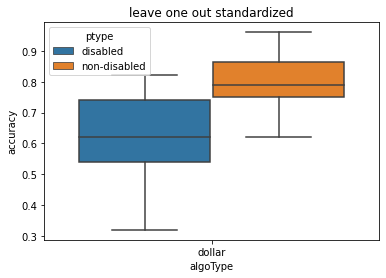

In [ ]:
df_standardized = pd.read_csv(temp_path+'standardized/standardized_algos_accuracy_3.csv')
# temp = pd.melt(df_accuracy,id_vars=['ptype','algoType'],value_vars=['train','test'])
# display(temp.head())
sns.boxplot(data=df_standardized,x="algoType",y="test",hue="ptype",hue_order=['disabled','non-disabled'])
plt.title('leave one out standardized')
plt.ylabel('accuracy')

## plot all together

Text(0, 0.5, '')

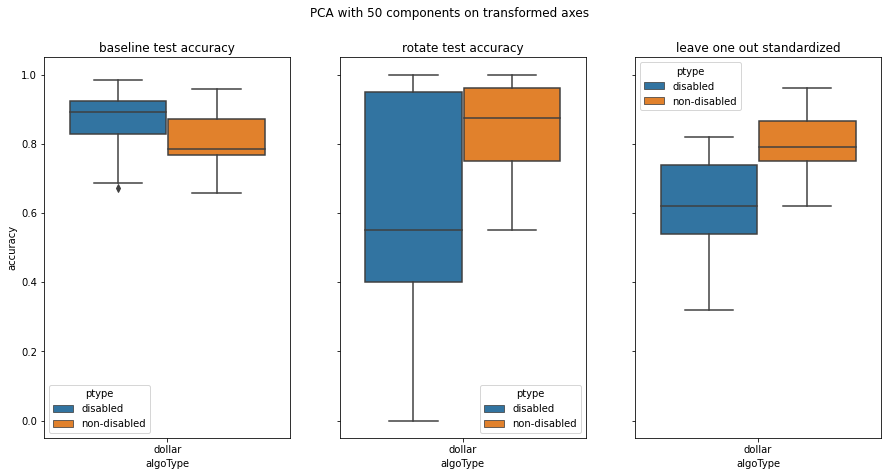

In [ ]:
fig,[ax1,ax2,ax3] = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,7))

# plot baseline
sns.boxplot(data=df_accuracy,x="algoType",y="test",hue="ptype",hue_order=['disabled','non-disabled'],ax=ax1)

ax1.set_title('baseline test accuracy')
ax1.set_ylabel('accuracy')

# plot rotate
sns.boxplot(data=df_rotate_accuracy,x="algoType",y="test",hue="ptype",hue_order=['disabled','non-disabled'],ax=ax2)
ax2.set_title('rotate test accuracy')
ax2.set_ylabel("")

# plot standardized
sns.boxplot(data=df_standardized,x="algoType",y="test",hue="ptype",hue_order=['disabled','non-disabled'],ax=ax3)
ax3.set_title('leave one out standardized')
plt.suptitle('PCA with 50 components on transformed axes')
ax3.set_ylabel("")

# remove folders

In [4]:
# import shutil
# try:
#     with open('data/participants.pickle', 'rb') as handle:
#         _, pIDs_personalized,pIDs_standardized,pIDs_analogous,pIDs_all = pickle.load(handle)
# except:
#     print("Was not able to open the participant IDs")
#     pass;

# p = "C:/Users/yamag/Box/Research/Data/$M data segmented/segmented_filtered_data/"
# for pID in pIDs_all:
#     folders = glob.glob(p+pID+"/*")
#     for folder in folders:
#         f = folder.split("\\")[-1]
#         if f=="experimenter-only" or f =="rotate":
#             shutil.rmtree(folder)

Was not able to open the participant IDs


NameError: name 'pIDs_all' is not defined